# Data Exploration 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Import Data

In [70]:
df_mtv = pd.read_csv("../../data/mtv_meta.csv")
df_mtv.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,title,also_buy,tech2,brand,rank,also_view,main_cat,similar_item,price,details
0,5.0,True,"04 8, 2018",A1CW3NLH9MBQRY,6303022901,{'Format:': ' DVD'},Sally Nunez,I really enjoyed this movie. Brings tears to m...,Five Stars,1523145600,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
1,5.0,True,"04 2, 2018",A1WK0IRZ08NX9X,6303022901,{'Format:': ' DVD'},Ammie28,"If you have never seen this movie, you may jus...",Heart Touching...,1522627200,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
2,5.0,True,"03 30, 2018",A2HGXJQCQTXE4E,6303022901,{'Format:': ' Blu-ray'},Pa nhia lee,awesome all time fave movie.,Five Stars,1522368000,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
3,5.0,True,"03 30, 2018",A14ASTA78EK120,6303022901,{'Format:': ' DVD'},lalush,The greatest movie ever!!!!!,Five Stars,1522368000,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
4,5.0,True,"03 29, 2018",A2EGT1RXKVOXTJ,6303022901,{'Format:': ' Amazon Video'},Karin,Love this movie,Five Stars,1522281600,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}


In [71]:
df_mtv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209056 entries, 0 to 209055
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         209056 non-null  float64
 1   verified        209056 non-null  bool   
 2   reviewTime      209056 non-null  object 
 3   reviewerID      209056 non-null  object 
 4   asin            209056 non-null  object 
 5   style           197666 non-null  object 
 6   reviewerName    209032 non-null  object 
 7   reviewText      208824 non-null  object 
 8   summary         208906 non-null  object 
 9   unixReviewTime  209056 non-null  int64  
 10  vote            5138 non-null    float64
 11  category        209056 non-null  object 
 12  description     209056 non-null  object 
 13  fit             0 non-null       float64
 14  title           209051 non-null  object 
 15  also_buy        209056 non-null  object 
 16  tech2           0 non-null       float64
 17  brand     

In [72]:
df_mtv = df_mtv.drop(['verified', 'rank', 'also_buy', 'also_view', 'details'], axis=1)

df_mtv = df_mtv.rename(columns={'overall':'rating', 'asin':'productID'})

In [73]:
df_mtv.shape

(209056, 19)

In [74]:
df_mtv.head()

,rating,reviewTime,reviewerID,productID,style,reviewerName,reviewText,summary,unixReviewTime,vote,category,description,fit,title,tech2,brand,main_cat,similar_item,price
0,5.0,"04 8, 2018",A1CW3NLH9MBQRY,6303022901,{'Format:': ' DVD'},Sally Nunez,I really enjoyed this movie. Brings tears to m...,Five Stars,1523145600,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
1,5.0,"04 2, 2018",A1WK0IRZ08NX9X,6303022901,{'Format:': ' DVD'},Ammie28,"If you have never seen this movie, you may jus...",Heart Touching...,1522627200,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
2,5.0,"03 30, 2018",A2HGXJQCQTXE4E,6303022901,{'Format:': ' Blu-ray'},Pa nhia lee,awesome all time fave movie.,Five Stars,1522368000,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
3,5.0,"03 30, 2018",A14ASTA78EK120,6303022901,{'Format:': ' DVD'},lalush,The greatest movie ever!!!!!,Five Stars,1522368000,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
4,5.0,"03 29, 2018",A2EGT1RXKVOXTJ,6303022901,{'Format:': ' Amazon Video'},Karin,Love this movie,Five Stars,1522281600,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28


Text(0, 0.5, 'Count')

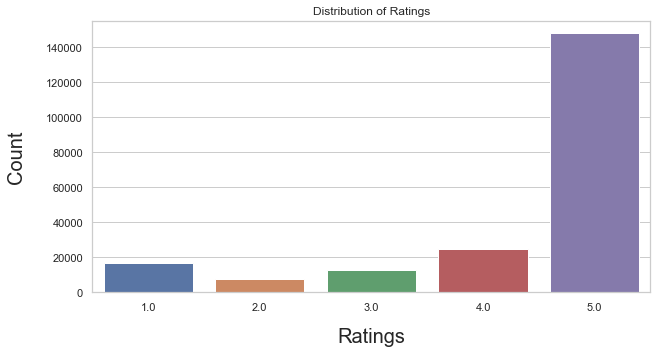

In [75]:
import seaborn as sns

sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)
plt.figure(figsize = (10, 5))
ax = sns.countplot(x="rating", data=df_mtv, alpha=1)

plt.title("Distribution of Ratings")
plt.xlabel("Ratings", fontsize = 20, labelpad=15)
plt.ylabel("Count", fontsize = 20,labelpad=20)

In [76]:
df_mtv.rating.value_counts(normalize=True)

5.0    0.707026
4.0    0.117404
1.0    0.079869
3.0    0.060233
2.0    0.035469
Name: rating, dtype: float64

In [77]:
# Reviewer's rating counts
reviewer_count = df_mtv.groupby('reviewerID')['rating'].count()

# Productwise rating counts
product_count = df_mtv.groupby('title')['rating'].count()

# 
reviewer_count.sort_values(ascending = False)

reviewerID
AJ2LH4FFW4QYX           110
A3QXT4RO4RBPCL           99
A5RGNTKP1A87U            98
A471W6ANJU6W9            86
A1ADJ8AD91RE0J           82
                       ... 
A3ALWY9H7F5T9C            1
A3ALYXTZMFUOOS            1
A3ALZNAQSPSF9D            1
A3AM0ULPMABZZT            1
A0040332ZUSVVN7CM6P0      1
Name: rating, Length: 120001, dtype: int64

In [79]:
top_reviewers = reviewer_count.sort_values(ascending=False)[:20]
count_reviewers = len(reviewer_count)
print("Total number of reviewers in 2018: ", count_reviewers)
print('Top 20 reviewers: ',top_reviewers)

Total number of reviewers in 2018:  120001
Top 20 reviewers:  reviewerID
AJ2LH4FFW4QYX     110
A3QXT4RO4RBPCL     99
A5RGNTKP1A87U      98
A471W6ANJU6W9      86
A1ADJ8AD91RE0J     82
AG8OC1AEP44WU      82
A2764UZVBFC61W     80
A3EKNWZOV3EZXC     79
AGB3M4QPM0MIU      78
A54ERXXP81MF       75
AVBJBOK7CQTEQ      71
A1UI1DY6CPWHY5     69
A3HOMAS5ODFCW6     67
A292UXMLXC60UZ     65
AUSLDE6RFBM2O      64
A3V0D97QKXDN5R     63
A1MD1UJUNN0FRF     62
A1O0ZP73F9OQ6T     62
A2HFT9LTGLPCYZ     59
A6YRRF042L3NA      59
Name: rating, dtype: int64


### Top 20 productw (Movies & TV)

In [80]:
top_products = product_count.sort_values(ascending=False)[:20]
count_products = len(reviewer_count)
print("Total number of products reviewed in 2018: ", count_products)
print('Top 20 products reviews: ',top_products)

Total number of products reviewed in 2018:  120001
Top 20 products reviews:  title
Deadpool 2016                                                             959
Harry Potter - Complete 8-Film Collection                                 892
Blade Runner: The Final Cut                                               601
John Wick                                                                 519
Guardians Of The Galaxy Region Free                                       511
Guardians of the Galaxy [Blu-ray]                                         511
Guardians of the Galaxy                                                   511
An Inspector Calls (Region 3 DVD / Non USA Region) (English Subtitled)    506
Harry Potter Collezione Completa (8 Blu-Ray)                              464
Me Before You (BD)                                                        457
The Dressmaker                                                            457
Sicario                                                    

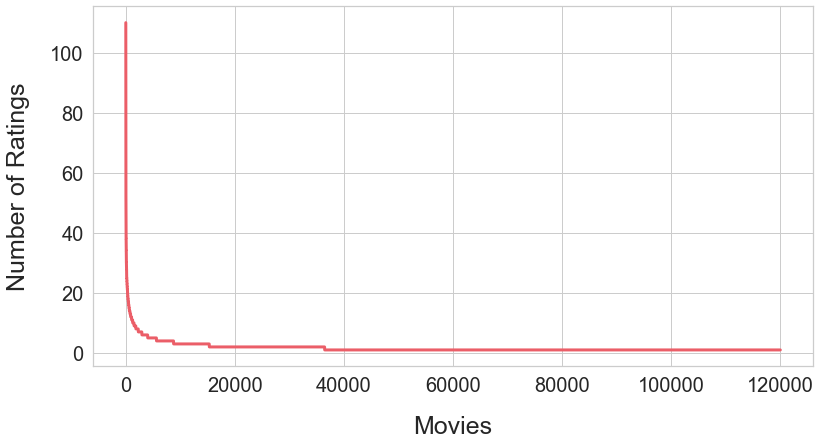

In [81]:
fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1,0.1,1,1])
# plt.title("Number of Ratings Per Movie", fontsize = 20)
plt.xlabel("Movies", fontsize = 25, labelpad=20)
plt.ylabel("Number of Ratings", fontsize = 25, labelpad=20)
plt.plot(reviewer_count.sort_values(ascending = False).values, color='#eb5e68', linewidth=3)
plt.tick_params(labelsize = 20)


### Top 20 Reviewers

<AxesSubplot:title={'center':'Top Reviewers'}, xlabel='Counts', ylabel='reviewerID'>

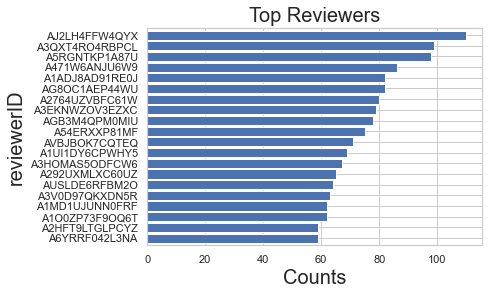

In [82]:
#figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Counts", fontsize = 20)
plt.ylabel("Reviewers", fontsize = 20)
plt.title('Top Reviewers', fontsize = 20)
top_reviewers.sort_values().plot(kind='barh', zorder=2, width=0.85)


<AxesSubplot:title={'center':'Top 20 Movies'}, xlabel='Counts', ylabel='title'>

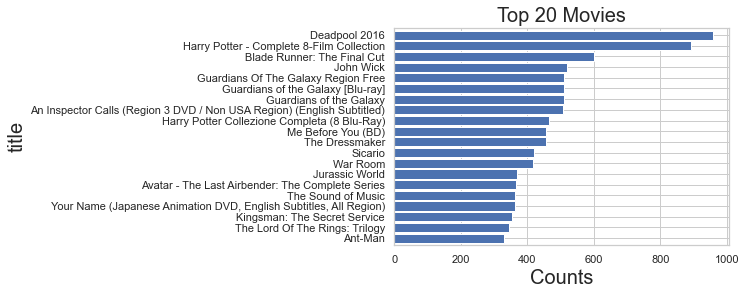

In [83]:
#figure(num=None, figsize=(10, 6))
plt.xlabel("Counts", fontsize = 20)
plt.ylabel("Movie", fontsize = 20)
plt.title('Top 20 Movies', fontsize = 20)
top_products.sort_values().plot(kind='barh', zorder=2,  width=0.85)

In [84]:
top_products[1]

892

## Summary findings

'''
a) In 2018, the majority of movies and tv shows have gotten 5 start ratings (65%)
'''

# FSM

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [86]:
le_reviewer = LabelEncoder()
df_mtv['reviewer'] = le_reviewer.fit_transform(df_mtv['reviewerID'].astype(str).values)
n_reviewers = df_mtv['reviewer'].nunique()
le_movie = LabelEncoder()
df_mtv['movie'] = le_movie.fit_transform(df_mtv['title'].astype(str).values)
n_movies = df_mtv['movie'].nunique()
df_mtv['rating'] = df_mtv['rating'].values.astype(np.float32)
print(n_reviewers, n_movies)

120001 38811


In [87]:
X = df_mtv[['reviewer', 'movie']].values
y = df_mtv['rating'].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((167244, 2), (41812, 2), (167244,), (41812,))

In [90]:
# import libraries:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [91]:
#use embeddings to represent each user and each movie in the data. 
#These embeddings will be vectors (of size n_factors) that start out as random numbers but are fit by the model to 
# capture the essential qualities of each user/movie.

def RecommenderV(n_reviewers, n_movies, n_factors):
    reviewer = Input(shape=(1,))
    r = Embedding(n_reviewers, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(reviewer)
    r = Reshape((n_factors,))(r)
    
    movie = Input(shape=(1,))
    m = Embedding(n_movies, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(movie)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([r, m])
    model = Model(inputs=[reviewer, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [92]:
# set up the nunmber of factors, higher number of factors leads to higher personalization
n_factors = 50
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

model = RecommenderV(n_reviewers, n_movies, n_factors)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 50)        6000050     input_5[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 50)        1940550     input_6[0][0]                    
____________________________________________________________________________________________

In [93]:
history = model.fit(x=X_train_array, y=y_train, batch_size=256, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

Epoch 1/5
654/654 [==============================] - 29s 44ms/step - loss: 20.3328 - val_loss: 20.1698
Epoch 2/5
654/654 [==============================] - 29s 44ms/step - loss: 19.6835 - val_loss: 19.3266
Epoch 3/5
654/654 [==============================] - 29s 44ms/step - loss: 16.9312 - val_loss: 18.1925
Epoch 4/5
654/654 [==============================] - 29s 44ms/step - loss: 12.9538 - val_loss: 17.2473
Epoch 5/5
654/654 [==============================] - 30s 45ms/step - loss: 9.3415 - val_loss: 16.5925


In [94]:
history = model.fit(x=X_train_array, y=y_train, batch_size=32, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

Epoch 1/5
5227/5227 [==============================] - 290s 55ms/step - loss: 6.0065 - val_loss: 15.9450
Epoch 2/5
5227/5227 [==============================] - 293s 56ms/step - loss: 3.8248 - val_loss: 15.7513
Epoch 3/5
5227/5227 [==============================] - 287s 55ms/step - loss: 2.8444 - val_loss: 15.6914
Epoch 4/5
5227/5227 [==============================] - 244s 47ms/step - loss: 2.3385 - val_loss: 15.6810
Epoch 5/5
5227/5227 [==============================] - 217s 41ms/step - loss: 2.1539 - val_loss: 15.6950


In [96]:
from sklearn.preprocessing import LabelEncoder
reviewer_enc = LabelEncoder()
df_mtv['reviewer'] = reviewer_enc.fit_transform(df_mtv['reviewerID'].astype(str).values)
n_reviewers = df_mtv['reviewer'].nunique()
movie_enc = LabelEncoder()
df_mtv['movie'] = movie_enc.fit_transform(df_mtv['title'].astype(str).values)
n_movies = df_mtv['movie'].nunique()
df_mtv['rating'] = df_mtv['rating'].values.astype(np.float32)
print(n_reviewers, n_movies)

120001 38811


In [98]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_mtv, test_size=0.2, random_state=42)

In [99]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.models import Model
movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(n_movies+1, 5, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_reviewers+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], prod)
model.compile('adam', 'mae')

In [100]:
print(n_reviewers, n_movies)

120001 38811


In [101]:
train.productID.astype(str).values[0]

'B00LOCLCPU'

In [102]:
history = model.fit([train.reviewer, 
                     train.movie], 
                    train.rating.values.astype(np.float32), 
                    epochs=10, 
                    verbose=1,
                   validation_data=([test.reviewer, test.movie], test.rating))

Epoch 1/10
5227/5227 [==============================] - 18s 3ms/step - loss: 4.3340 - val_loss: 4.3296
Epoch 2/10
5227/5227 [==============================] - 20s 4ms/step - loss: 4.3072 - val_loss: 4.2994
Epoch 3/10
5227/5227 [==============================] - 21s 4ms/step - loss: 4.1979 - val_loss: 4.2401
Epoch 4/10
5227/5227 [==============================] - 21s 4ms/step - loss: 3.9832 - val_loss: 4.1629
Epoch 5/10
5227/5227 [==============================] - 18s 3ms/step - loss: 3.7111 - val_loss: 4.0833
Epoch 6/10
5227/5227 [==============================] - 19s 4ms/step - loss: 3.3983 - val_loss: 4.0094
Epoch 7/10
5227/5227 [==============================] - 18s 4ms/step - loss: 3.0691 - val_loss: 3.9435
Epoch 8/10
5227/5227 [==============================] - 21s 4ms/step - loss: 2.7618 - val_loss: 3.8874
Epoch 9/10
5227/5227 [==============================] - 20s 4ms/step - loss: 2.4726 - val_loss: 3.8401
Epoch 10/10
5227/5227 [==============================] - 18s 3ms/step - l